In [40]:
from nltk.tokenize import word_tokenize, WordPunctTokenizer, TreebankWordTokenizer
import konlpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [42]:
train = pd.read_csv('train.csv').drop('ID',axis=1)
test = pd.read_csv('test.csv').drop('ID',axis=1)

## 토큰화
- 토큰화 & 정제 & 정규화

    - 토큰화 : 주어진 corpus에서 token이라 불리는 단위로 나누는 작ㅇ덥


In [13]:
train.shape

(2478, 4)

In [11]:
train.head()

,first_party,second_party,facts,first_party_winner
0,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [43]:
for col in tqdm(train.columns[:-1]):
    lst = []
    for ttxt in tqdm(train[col]):
        while(True):
            if ttxt[-1] == ' ':
                ttxt = ttxt[:-1]
            else:
                break
        lst.append(ttxt)
    train[col] = lst

100%|██████████| 3/3 [00:00<00:00, 295.20it/s]


In [44]:
token = TreebankWordTokenizer()



,first_party,second_party,facts,first_party_winner
0,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1
...,...,...,...,...
2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1
2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.","Alliance Bond Fund, Inc., an investment fund, ...",1
2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0
2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0


In [17]:
train_test = pd.Series(train['first_party'].unique())

In [20]:
train_test_2 = pd.Series(train['first_party'].str.replace('et al.','').unique())

In [35]:
train_test_2[5]

'C & A Carbone, Inc., '

In [37]:
lst = []

for first_unique in tqdm(train_test_2):
    while(True):
        if first_unique[-1] == ' ':
            first_unique = first_unique[:-1]
        elif first_unique[-1] == ',':
            first_unique = first_unique[:-1]
        else:
            break
    lst.append(first_unique)

100%|██████████| 2110/2110 [00:00<?, ?it/s]


In [38]:
tt_2 = pd.Series(lst)

In [47]:
test.columns

Index(['first_party', 'second_party', 'facts'], dtype='object')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

train = pd.read_csv('train.csv').drop('ID',axis=1)
test = pd.read_csv('test.csv').drop('ID',axis=1)

for col in tqdm(train.columns[:-1]):
    lst = []
    for ttxt in tqdm(train[col]):
        while(True):
            if ttxt[-1] == ' ':
                ttxt = ttxt[:-1]
            else:
                break
        lst.append(ttxt)
    train[col] = lst

for col in tqdm(test.columns):
    lst = []
    for ttxt in tqdm(test[col]):
        while(True):
            if ttxt[-1] == ' ':
                ttxt = ttxt[:-1]
            else:
                break
        lst.append(ttxt)
    test[col] = lst

100%|██████████| 3/3 [00:00<00:00, 375.05it/s]


In [3]:
print('train data의 수 :',len(train))
print('test data의 수 :',len(test))

train data의 수 : 2478
test data의 수 : 1240


In [4]:
train[:5]

,first_party,second_party,facts,first_party_winner
0,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   first_party         2478 non-null   object
 1   second_party        2478 non-null   object
 2   facts               2478 non-null   object
 3   first_party_winner  2478 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 77.6+ KB


In [6]:
print('결측값 여부 :',train.isnull().values.any())

결측값 여부 : False


In [7]:
print('facts열의 유니크한 값 :',train['facts'].nunique())

facts열의 유니크한 값 : 2478


In [8]:
train.drop_duplicates(subset=['facts'], inplace=True)
print('총 샘플의 수 :',len(train))

총 샘플의 수 : 2478


<Axes: xlabel='first_party_winner'>

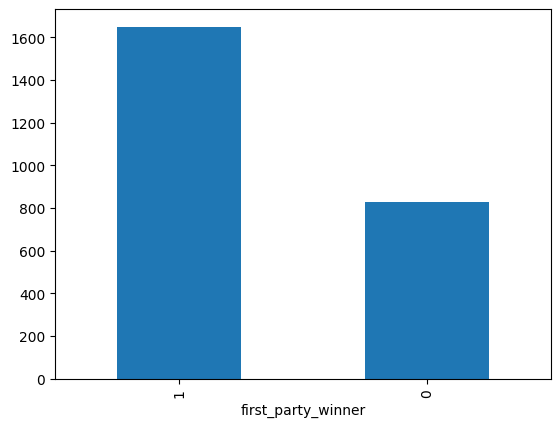

In [9]:
train['first_party_winner'].value_counts().plot(kind='bar')

In [10]:
print('정상 메일과 스팸 메일의 개수')
print(train.groupby('first_party_winner').size().reset_index(name='count'))

정상 메일과 스팸 메일의 개수
   first_party_winner  count
0                   0    829
1                   1   1649


In [12]:
print(f'패소 비율 = {round(train["first_party_winner"].value_counts()[0]/len(train) * 100,3)}%')
print(f'승소 비율 = {round(train["first_party_winner"].value_counts()[1]/len(train) * 100,3)}%')

패소 비율 = 33.454%
승소 비율 = 66.546%


In [13]:
X_data = train['facts']
y_data = train['first_party_winner']
print('사건의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

사건의 개수: 2478
레이블의 개수: 2478


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [15]:
print('--------훈련 데이터의 비율-----------')
print(f'패소 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'승소 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

--------훈련 데이터의 비율-----------
패소 = 33.451%
승소 = 66.549%


In [16]:
print('--------검증 데이터의 비율-----------')
print(f'패소 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'승소 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------검증 데이터의 비율-----------
패소 = 33.468%
승소 = 66.532%


In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[:5])

[[11, 920, 697, 1032, 11386, 11387, 11388, 4006, 10, 941, 4, 1078, 15, 120, 338, 2, 1, 3126, 8646, 6947, 130, 894, 245, 23, 476, 539, 138, 1, 164, 8647, 504, 11389, 6948, 8648, 4, 2359, 3373, 31, 510, 46, 2248, 15, 16, 103, 522, 64, 424, 1, 2626, 1, 120, 236, 31, 510, 11, 246, 2, 589, 3, 5036, 698, 4, 2249, 1079, 921, 120, 164, 411, 3653, 3127, 3374, 1709, 3654, 4, 5037, 5038, 31, 92, 183, 1, 29, 27, 349, 2789, 190, 589, 22, 68, 33, 205, 529, 2627, 3, 8649, 11390, 5036, 33, 8650, 80, 615, 7, 1, 406, 922, 33, 5835, 2, 80, 98, 33, 1464, 1768, 3, 57, 15, 1, 335, 33, 362, 2, 1, 61, 53, 1, 857, 47, 51, 1, 433, 164, 3653, 1294, 145, 2, 1033, 3, 2059, 1079, 921, 876, 4, 300, 5835, 4, 11391, 2, 1207, 4, 256, 274, 530, 3, 20, 5039, 4, 406, 2360, 3, 4, 23, 373, 11, 148, 4007, 1, 236, 146, 3, 230, 1, 857, 187, 6, 28, 39, 13, 1549, 5, 670, 434, 2, 86, 26, 29, 27, 44, 1, 12, 8, 189, 4, 111, 1, 857, 1, 426, 89, 187, 6, 1, 857, 164, 7, 213, 5, 434, 2, 86, 26, 1, 300, 222, 125, 2, 1, 275, 54], [4458, 

In [18]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'the': 1, 'of': 2, 'to': 3, 'and': 4, 'a': 5, 'that': 6, 'in': 7, 'court': 8, 'for': 9, 'was': 10, 'on': 11, 'district': 12, 'not': 13, 'his': 14, 'by': 15, 'an': 16, 'had': 17, 'with': 18, 'appeals': 19, 'state': 20, 'federal': 21, 'as': 22, 'from': 23, 'circuit': 24, 'he': 25, 'under': 26, 's': 27, 'it': 28, 'u': 29, 'which': 30, 'were': 31, 'act': 32, 'or': 33, 'held': 34, 'because': 35, 'be': 36, 'supreme': 37, 'at': 38, 'did': 39, 'after': 40, 'its': 41, 'trial': 42, 'affirmed': 43, 'law': 44, 'case': 45, 'but': 46, 'filed': 47, 'their': 48, 'they': 49, 'is': 50, 'against': 51, 'denied': 52, 'states': 53, 'amendment': 54, 'found': 55, 'argued': 56, 'him': 57, 'this': 58, 'her': 59, 'appeal': 60, 'united': 61, 'violated': 62, 'new': 63, 'jury': 64, 'when': 65, 'reversed': 66, 'granted': 67, 'two': 68, 'decision': 69, 'evidence': 70, 'would': 71, 'claim': 72, 'other': 73, 'have': 74, 'government': 75, 'first': 76, 'police': 77, 'who': 78, 'claims': 79, 'any': 80, 'motion': 81, 'sui

In [19]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 6806
단어 집합(vocabulary)에서 희귀 단어의 비율: 37.414105876532346
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.9415703155978903


In [20]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 18192


사건의 최대 길이 : 674
사건의 평균 길이 : 176.862260


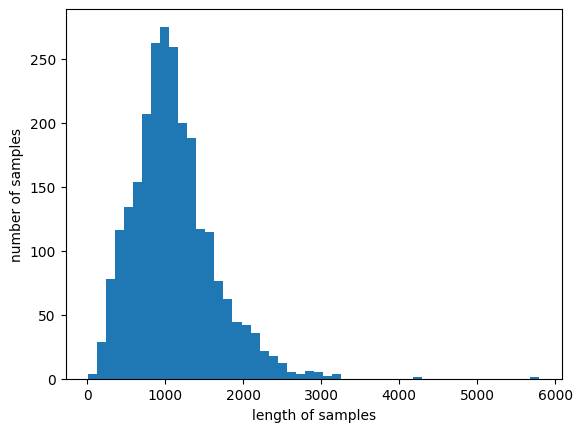

In [21]:
print('사건의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('사건의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [22]:
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (1982, 189)


In [91]:
pd.DataFrame(y_train)

,first_party_winner
299,1
2232,1
955,0
1304,0
1212,1
...,...
2390,1
2325,0
167,1
79,0


In [99]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

y_tr_ohe = encoder.fit_transform(pd.DataFrame(y_train))
y_te_ohe = encoder.transform(pd.DataFrame(y_test))

c:\jhs_pr\jhs_tf\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [104]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(2, activation='softmax'))

# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

model.summary()

# history = model.fit(X_train_padded, y_train, epochs=50, batch_size=32, validation_split=0.2)
history = model.fit(X_train_padded, y_tr_ohe, epochs=1, batch_size=32, validation_split=0.2)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, None, 32)          582144    
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_36 (Dense)            (None, 2)                 66        
                                                                 
Total params: 584,290
Trainable params: 584,290
Non-trainable params: 0
_________________________________________________________________
50/50 [==============================] - 1s 16ms/step - loss: 0.6494 - acc: 0.6473 - val_loss: 0.6477 - val_acc: 0.6474


In [105]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 검증 정확도: %.4f" % (model.evaluate(X_test_padded, y_te_ohe)[1]))

16/16 [==============================] - 0s 4ms/step - loss: 0.6359 - acc: 0.6653

 검증 정확도: 0.6653


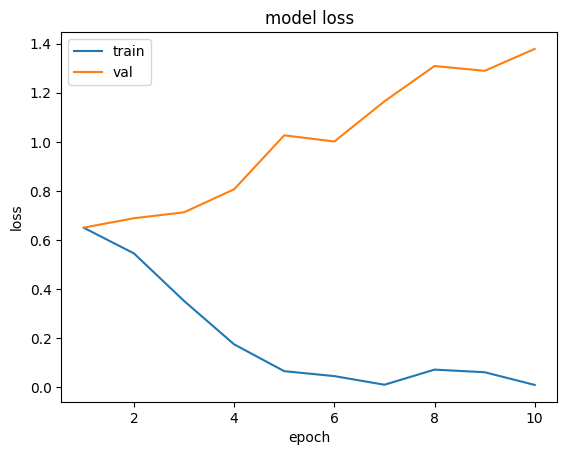

In [102]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

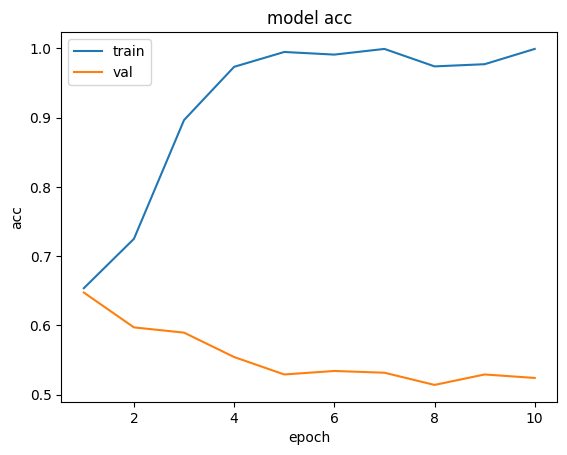

In [103]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [26]:
test_x = test['facts']

print('test data의 사건의 개수: {}'.format(len(test_x)))

test_x_encoded = tokenizer.texts_to_sequences(test_x)
test_x_padded = pad_sequences(test_x_encoded, maxlen = max_len)

print("test data의 크기(shape):", test_x_padded.shape)

test data의 사건의 개수: 1240
test data의 크기(shape): (1240, 189)


In [107]:
result = model.predict(X_train_padded)

62/62 [==============================] - 0s 3ms/step


In [113]:
new = pd.DataFrame(result)

In [114]:
submission = pd.read_csv('sample_submission.csv')

submission['first_party_winner'] = 1

In [116]:
submission.to_csv('test_deep.csv',index=False)